![title](https://doity.com.br/media/doity/eventos/evento-20025-logo_organizador.png)

# Prova de Descoberta do Conhecimento

* **Prof. Cleilton Lima Rocha**
* **emails:** climarocha@gmail.com
* **deadline: 29/12**

* ** Equipe **
** Francisco Flávio Cardoso Gomes
** Jean Maia
** Israel Portela

Para este projeto exploraremos os dados **Call_Data.csv** disponível na pasta.


Para facilitar a administração da segurança pública, o Departamento de Polícia de Seattle dividiu a cidade em 5 partes, cada uma com uma delegacia. Cada delegacia foi subdividida em setores, e estes foram divididos em beats (hondas). A administração tem um dataset chamado Call_Data, para obter maiores informações acesse este [link](https://data.seattle.gov/Public-Safety/Call-Data/33kz-ixgy).

O objetivo do nosso projeto é apoiar os policiais quanto as medidas prescritivas que eles devem tomar ao tentarem resolver uma chamada. Para isto eles têm disponível o histórico de tudo o que já foi resolvido, por ele e por seus colegas, e sua solução de Data Science capaz de prever a variável alvo da nossa prova será **Event Clearance Description**.

Boa prova e hands on!

**PS.:**
* Quando houver necessidade de splitar os dados aplique a proporção 70 para treino e 30 para teste
* Quando houver necessidade de utilizar o random_state defina o valor 100
* O título do email deve ser "Prova KDD - Turma 6 - [Membros da equipe]"
* Envie o código fonte e o report (File ==> Download As ==> Html ou PDF), com o nome dos membros da equipe, para meu email, climarocha@gmail.com até o dia **29/12**.

# Questões

**1. Importe o data set *call_data.csv* e considere a variável alvo 'Event Clearance Description'(0,5 pontos)** 
     * 1.1. Como está o balanceamento das classes?*
     * P.S.: Não é obrigatório aplicar o undersampling and oversampling sobre o dataset
     * P.S.: Se desejar você pode usar o dataset **call_data_small.csv** apenas pra agilizar o desenvolvimento no final tudo deve ser realizado com o **call_data.csv**

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score,r2_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import datetime
from sklearn.cluster import KMeans
from imblearn.under_sampling import NearMiss 




#**Resposta 1** 

##Leitura dos dados

In [80]:

df=pd.read_csv('/content/Call_Data.csv')
df_orig=df.copy()
df.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,1,2009000189336,CITATION ISSUED (CRIMINAL OR NON-CRIMINAL),"TELEPHONE OTHER, NOT 911",3,TRAFFIC - BLOCKING ROADWAY,TRAFFIC - BLOCKING ROADWAY,06/02/2009 03:43:08 AM,Jun 2 2009 05:47:21:000AM,WEST,QUEEN,Q1
1,2,2009000189340,PROBLEM SOLVING PROJECT,ONVIEW,7,"PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY","PREMISE CHECK, OFFICER INITIATED ONVIEW ONLY",06/02/2009 03:47:24 AM,Jun 2 2009 03:47:24:000AM,WEST,KING,K1
2,5,2009000189344,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",2,FIGHT - VERBAL/ORAL (NO WEAPONS),--DISTURBANCE - OTHER,06/02/2009 03:53:00 AM,Jun 2 2009 04:21:52:000AM,NORTH,NORA,N3
3,6,2009000189345,REPORT WRITTEN (NO ARREST),"TELEPHONE OTHER, NOT 911",2,ACC - HIT AND RUN (NO INJURIES). INCLUDES IP/JO,--TRAFFIC - MV COLLISION INVESTIGATION,06/02/2009 03:54:42 AM,Jan 1 1900 12:00:00:000AM,SOUTH,OCEAN,O1
4,8,2009000189348,REPORT WRITTEN (NO ARREST),ONVIEW,3,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--DISTURBANCE - OTHER,06/02/2009 03:58:02 AM,Jun 2 2009 03:58:02:000AM,WEST,KING,K2


##Analisar o Balanceamento das classes

In [81]:
pct=df['Event Clearance Description'].value_counts()/len(df)*100
pct


REPORT WRITTEN (NO ARREST)                    39.455004
ORAL WARNING GIVEN                            19.923680
CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)    13.379252
UNABLE TO LOCATE INCIDENT OR COMPLAINANT      10.252020
PHYSICAL ARREST MADE                           9.096893
FALSE COMPLAINT/UNFOUNDED                      4.497036
PROBLEM SOLVING PROJECT                        3.396116
Name: Event Clearance Description, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

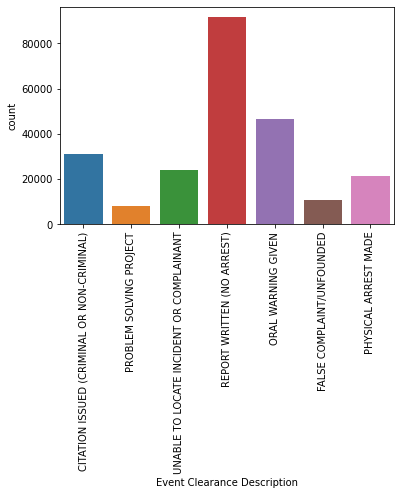

In [82]:
ax = sns.countplot(x=df['Event Clearance Description'], data=df)
plt.xticks(rotation=90)

##Percebe-se um nítido desbalanceamento entre as classes, com a solução REPORT WRITTEN (NO ARREST) tendo uma predominância sobre as demais. Mais na frente iremos processar o balanceamento das classes

**2. Realize o EDA que você julgar necessário (análise exploratória dos dados), o objetivo do EDA é mostrar alguns insights sobre os dados (1,0 pontos)**
   * PS.: Utilize recursos visuais, por exemplo gráficos

#**Resposta 2** 

##10 principais ocorrências classificadas por "Initial Call Type" - Traffic Stop é Suspicius Stop são os dois principais tipos de chamadas


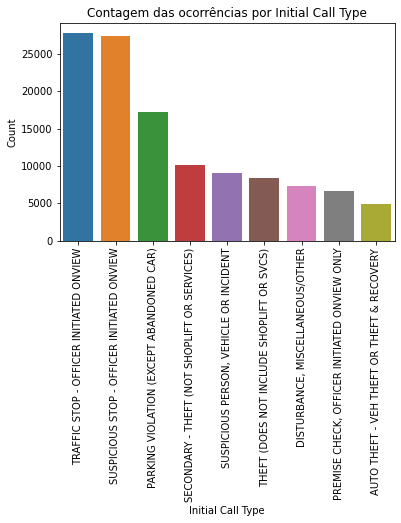

In [83]:
sns.countplot(x="Initial Call Type", data=df,order = df['Initial Call Type'].value_counts()[0:9].index)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Contagem das ocorrências por Initial Call Type')
plt.show()




##Contagem das ocorrências por Sector - King e David são os dois policiais que mais atenderam aos chamados



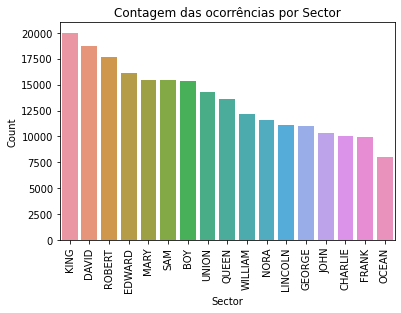

In [84]:
sns.countplot(x="Sector", data=df,order = df['Sector'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Contagem das ocorrências por Sector')
plt.show()

##Contagem de Ocorrências por "Precinct" - As regiões West e North são de onde foram originadas a maior quantidade de chamadas

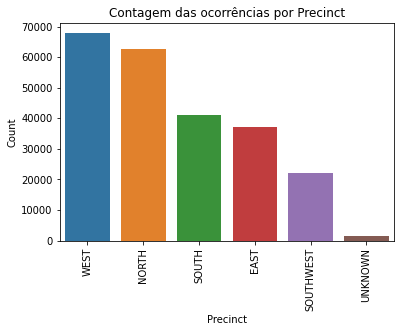

In [85]:
sns.countplot(x="Precinct", data=df,order = df['Precinct'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Contagem das ocorrências por Precinct')
plt.show()

##Distribuição de frequência da prioridade das chamadas

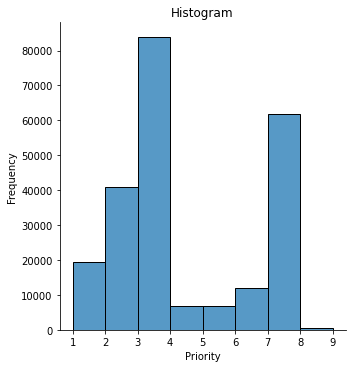

In [86]:
sns.displot(df, x="Priority",binwidth=1)
plt.ylabel('Frequency')
plt.xlabel('Priority')
plt.title('Histogram')
plt.show()

##Grafico mostrando a solução do chamado. Vemos que a grande maioria foi resolvido apenas com um relatóril -  sem prisão

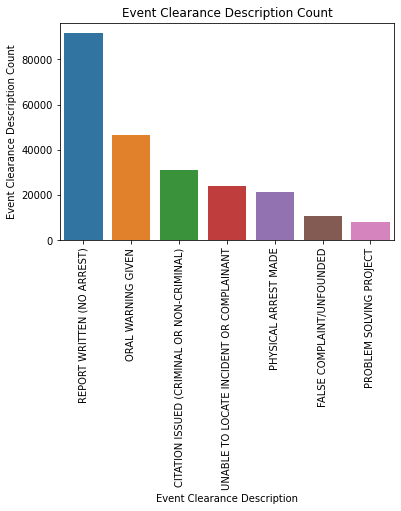

In [87]:
sns.countplot(x="Event Clearance Description", data=df,order = df['Event Clearance Description'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Event Clearance Description Count')
plt.title('Event Clearance Description Count')
plt.show()

##Contagem de como o chamado foi resolvido de acordo com sua prioridade. Verifica-se que os casos com prioridade 7 terminaram em sua maioria com prisão

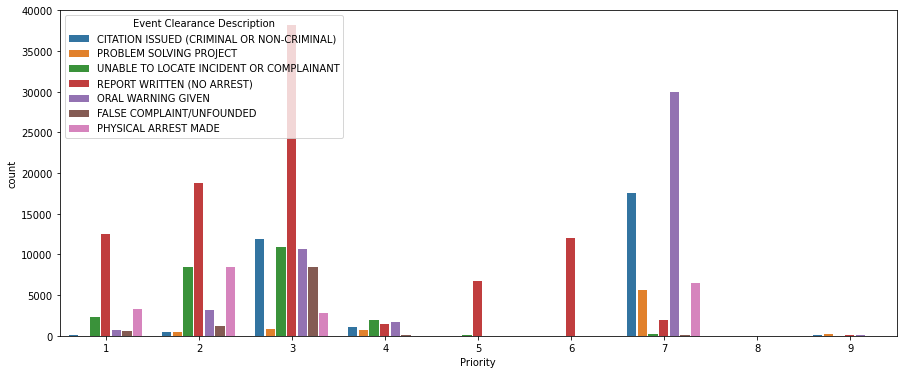

In [88]:

fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(data=df, ax=ax, x=df["Priority"],  hue="Event Clearance Description")

def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value
        # we change the bar width
        patch.set_width(new_value)
        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .1)

change_width(ax, .1)
plt.show()

**3. Realize o tratamento que você julgar mais adequado aos dados. (2,0 pontos)**
  * P.S.: Explique, com suas palavras, porque o processo de feature engineering é necessário
  * P.S.: A criação de um pipeline lhe dará pontos extras e melhorará o reaproveitamento de código

#**Resposta 3**

##O processo de engenharia de features é a fase mais importante e trabalhosa quando se deseja ter um aprendizado de máquina eficiente. Seja por inconsistência, ruídos, dados faltantes ou até mesmo pouca quantidade de informação, o que se deseja aqui é que o modelo de machine learning não seja prejudicado por falha nos dados.

##Verificação e correção dos nulos

In [89]:
 df.isnull().sum().sort_values(ascending=False)

Sector                         1550
Beat                              0
Precinct                          0
Arrived Time                      0
Original Time Queued              0
Final Call Type                   0
Initial Call Type                 0
Priority                          0
Call Type                         0
Event Clearance Description       0
CAD Event Number                  0
Unnamed: 0                        0
dtype: int64

##Existência de nulos apenas para o atributo Sector. Vamos substituir os nulos de Sector pela moda, que é a medida mais indicada pra atributo categórico

In [90]:
df['Sector'].fillna(df['Sector'].mode()[0], inplace=True)
df['Beat'].fillna(df['Beat'].mode()[0], inplace=True)
df['Precinct'].fillna(df['Precinct'].mode()[0], inplace=True)
df.isnull().sum().sort_values(ascending=False)

Beat                           0
Sector                         0
Precinct                       0
Arrived Time                   0
Original Time Queued           0
Final Call Type                0
Initial Call Type              0
Priority                       0
Call Type                      0
Event Clearance Description    0
CAD Event Number               0
Unnamed: 0                     0
dtype: int64

##Verificar o tipo dos dados

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232442 entries, 0 to 232441
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Unnamed: 0                   232442 non-null  int64 
 1   CAD Event Number             232442 non-null  int64 
 2   Event Clearance Description  232442 non-null  object
 3   Call Type                    232442 non-null  object
 4   Priority                     232442 non-null  int64 
 5   Initial Call Type            232442 non-null  object
 6   Final Call Type              232442 non-null  object
 7   Original Time Queued         232442 non-null  object
 8   Arrived Time                 232442 non-null  object
 9   Precinct                     232442 non-null  object
 10  Sector                       232442 non-null  object
 11  Beat                         232442 non-null  object
dtypes: int64(3), object(9)
memory usage: 21.3+ MB


##Apenas priority é do tipo Numérico. Os demais atributos são do tipo String

##Inicialmente vamos converter os dados de tempo para dia, mês, ano e segundo

In [92]:
x_datetime = pd.DataFrame()
x_datetime['arr_dia'] = df['Arrived Time'].str.slice(4,6).astype('int32')
mes = df['Arrived Time'].str.slice(0,3)
meses = {'Jan':1,'Feb':2, 'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
x_datetime['arr_mes'] = mes.map(meses)
x_datetime['arr_ano'] = df['Arrived Time'].str.slice(7,11).astype('int32')
hora=df['Arrived Time'].str.slice(12,20)
x_datetime['arr_seg']=hora.str.slice(0,2).astype(int)*3600+hora.str.slice(3,5).astype(int)*60+hora.str.slice(6,8).astype(int)
x_datetime['orig_dia'] = df['Original Time Queued'].str.slice(3,5).astype('int32')
x_datetime['orig_mes']  = df['Original Time Queued'].str.slice(0,2).astype('int32')
x_datetime['orig_mes']
x_datetime['orig_ano'] = df['Original Time Queued'].str.slice(6,10).astype('int32')
hora=df['Original Time Queued'].str.slice(11,19)
x_datetime['orig_seg']=hora.str.slice(0,2).astype(int)*3600+hora.str.slice(3,5).astype(int)*60+hora.str.slice(6,8).astype(int)


In [93]:
x_datetime.head()

,arr_dia,arr_mes,arr_ano,arr_seg,orig_dia,orig_mes,orig_ano,orig_seg
0,2,6,2009,20841,2,6,2009,13388
1,2,6,2009,13644,2,6,2009,13644
2,2,6,2009,15712,2,6,2009,13980
3,1,1,1900,43200,2,6,2009,14082
4,2,6,2009,14282,2,6,2009,14282


##Agora vamos examinar os valores unicos dos dados

In [94]:
np.unique(df[['Event Clearance Description']])

array(['CITATION ISSUED (CRIMINAL OR NON-CRIMINAL)',
       'FALSE COMPLAINT/UNFOUNDED', 'ORAL WARNING GIVEN',
       'PHYSICAL ARREST MADE', 'PROBLEM SOLVING PROJECT',
       'REPORT WRITTEN (NO ARREST)',
       'UNABLE TO LOCATE INCIDENT OR COMPLAINANT'], dtype=object)

In [95]:
df.nunique()

Unnamed: 0                     232442
CAD Event Number               232442
Event Clearance Description         7
Call Type                           9
Priority                            9
Initial Call Type                 238
Final Call Type                   317
Original Time Queued           231776
Arrived Time                   217201
Precinct                            6
Sector                             17
Beat                               89
dtype: int64

##Percebemos que os dados categóricos Initial Call Type e Final Call Type possuem um grande número de tipos diferentes, enquanto os demais posuem poucos tipos

##Vamos aplicar o Label Encoder nos dados categóricos e chamar a variável alvo de y

In [96]:
le_calltype = LabelEncoder()
le_initial = LabelEncoder()
le_final = LabelEncoder()
le_precinct = LabelEncoder()
le_sector = LabelEncoder()
le_beat = LabelEncoder()
le_event = LabelEncoder()

df['Call Type'] = le_calltype.fit_transform(df['Call Type'])
df['Initial Call Type'] = le_initial.fit_transform(df['Initial Call Type'])
df['Final Call Type'] = le_final.fit_transform(df['Final Call Type'])
df['Precinct'] = le_precinct.fit_transform(df['Precinct'])
df['Sector'] = le_sector.fit_transform(df['Sector'])
df['Beat'] = le_beat.fit_transform(df['Beat'])

df['Event Clearance Description'] = le_event.fit_transform(df['Event Clearance Description'])

y=df['Event Clearance Description']
df=df.drop(['Event Clearance Description','Unnamed: 0','CAD Event Number','Original Time Queued','Arrived Time'],axis=1)
df

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat
0,8,3,193,296,5,12,62
1,4,7,149,259,5,7,39
2,8,2,93,42,1,10,54
3,8,2,23,119,2,11,56
4,4,3,184,42,5,7,40
...,...,...,...,...,...,...,...
232437,4,7,198,118,5,12,64
232438,0,2,196,42,5,9,49
232439,8,6,169,111,3,4,24
232440,4,3,43,9,0,3,22


##Agora vamos concatenar os dados categóricos com os dados de tempo

In [97]:

x=pd.concat([df, x_datetime], axis=1, join='inner')

x.head()

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,arr_dia,arr_mes,arr_ano,arr_seg,orig_dia,orig_mes,orig_ano,orig_seg
0,8,3,193,296,5,12,62,2,6,2009,20841,2,6,2009,13388
1,4,7,149,259,5,7,39,2,6,2009,13644,2,6,2009,13644
2,8,2,93,42,1,10,54,2,6,2009,15712,2,6,2009,13980
3,8,2,23,119,2,11,56,1,1,1900,43200,2,6,2009,14082
4,4,3,184,42,5,7,40,2,6,2009,14282,2,6,2009,14282


##Vamos examinar a correlação entre os atributos

In [98]:
temp=x
temp['y']=y
temp

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,arr_dia,arr_mes,arr_ano,arr_seg,orig_dia,orig_mes,orig_ano,orig_seg,y
0,8,3,193,296,5,12,62,2,6,2009,20841,2,6,2009,13388,0
1,4,7,149,259,5,7,39,2,6,2009,13644,2,6,2009,13644,4
2,8,2,93,42,1,10,54,2,6,2009,15712,2,6,2009,13980,6
3,8,2,23,119,2,11,56,1,1,1900,43200,2,6,2009,14082,5
4,4,3,184,42,5,7,40,2,6,2009,14282,2,6,2009,14282,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232437,4,7,198,118,5,12,64,24,9,2010,27892,24,9,2010,27892,0
232438,0,2,196,42,5,9,49,24,9,2010,28320,24,9,2010,27985,6
232439,8,6,169,111,3,4,24,24,9,2010,28120,24,9,2010,28115,5
232440,4,3,43,9,0,3,22,24,9,2010,28199,24,9,2010,28199,5


In [99]:
corr=temp.corr()
corr

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,arr_dia,arr_mes,arr_ano,arr_seg,orig_dia,orig_mes,orig_ano,orig_seg,y
Call Type,1.000000,0.124456,0.130001,0.108828,0.002039,-0.030783,-0.029812,-0.060914,-0.076670,-0.149251,0.059208,-0.003373,-0.016582,0.000127,0.018726,0.000392
Priority,0.124456,1.000000,0.535294,0.253858,0.067263,-0.037175,-0.036242,0.042445,0.027338,0.123113,-0.021346,-0.004907,-0.026509,0.013262,0.021214,-0.409663
Initial Call Type,0.130001,0.535294,1.000000,0.368522,0.066405,-0.045062,-0.044186,0.011519,-0.005783,0.029150,0.008940,0.001251,-0.019592,0.022697,0.025649,-0.234007
Final Call Type,0.108828,0.253858,0.368522,1.000000,0.016270,-0.016640,-0.017216,-0.035476,-0.024054,-0.081885,0.024663,-0.005030,0.011073,-0.103447,0.006818,-0.122829
Precinct,0.002039,0.067263,0.066405,0.016270,1.000000,0.120142,0.122940,-0.000347,0.006514,0.012194,-0.000755,-0.005650,0.002048,-0.012165,0.001930,-0.004225
Sector,-0.030783,-0.037175,-0.045062,-0.016640,0.120142,1.000000,0.992277,0.014726,0.018825,0.042247,-0.009364,-0.001945,0.000032,-0.005126,-0.001151,0.034649
Beat,-0.029812,-0.036242,-0.044186,-0.017216,0.122940,0.992277,1.000000,0.014484,0.018221,0.042037,-0.009082,-0.002137,-0.000546,-0.004569,-0.000737,0.035134
arr_dia,-0.060914,0.042445,0.011519,-0.035476,-0.000347,0.014726,0.014484,1.000000,0.156701,0.384829,-0.121167,0.892440,-0.008192,-0.025944,-0.007909,0.039022
arr_mes,-0.076670,0.027338,-0.005783,-0.024054,0.006514,0.018825,0.018221,0.156701,1.000000,0.418222,-0.135693,-0.009062,0.875812,-0.565081,-0.008032,0.048034
arr_ano,-0.149251,0.123113,0.029150,-0.081885,0.012194,0.042247,0.042037,0.384829,0.418222,1.000000,-0.312284,-0.000779,-0.008572,0.009835,-0.017180,0.079497


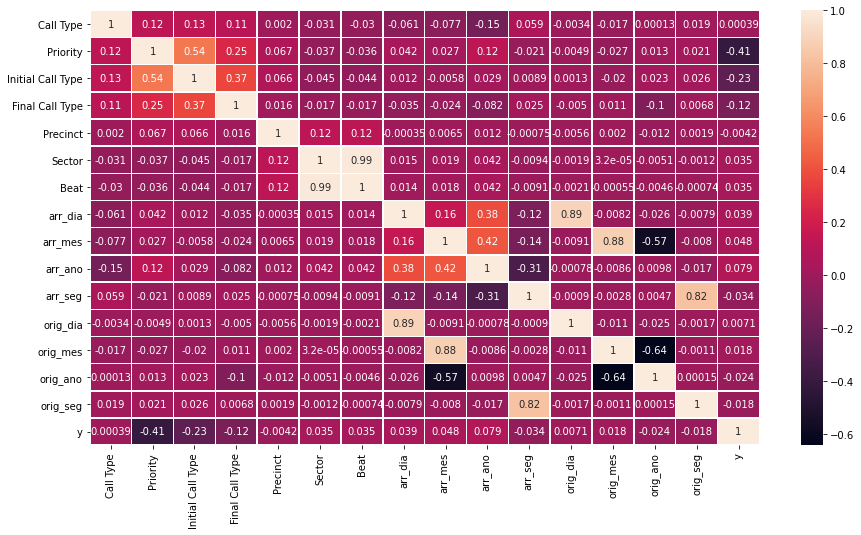

In [100]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr, linewidth=0.5,annot=True)
plt.show()

##Verifica-se uma correlação maior da variável alvo (y) com Priority e Initial Call Type. 

##Vamos examinar a auto-correlação entre os atributos

In [101]:
corr = x.corr()
corr

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,arr_dia,arr_mes,arr_ano,arr_seg,orig_dia,orig_mes,orig_ano,orig_seg,y
Call Type,1.000000,0.124456,0.130001,0.108828,0.002039,-0.030783,-0.029812,-0.060914,-0.076670,-0.149251,0.059208,-0.003373,-0.016582,0.000127,0.018726,0.000392
Priority,0.124456,1.000000,0.535294,0.253858,0.067263,-0.037175,-0.036242,0.042445,0.027338,0.123113,-0.021346,-0.004907,-0.026509,0.013262,0.021214,-0.409663
Initial Call Type,0.130001,0.535294,1.000000,0.368522,0.066405,-0.045062,-0.044186,0.011519,-0.005783,0.029150,0.008940,0.001251,-0.019592,0.022697,0.025649,-0.234007
Final Call Type,0.108828,0.253858,0.368522,1.000000,0.016270,-0.016640,-0.017216,-0.035476,-0.024054,-0.081885,0.024663,-0.005030,0.011073,-0.103447,0.006818,-0.122829
Precinct,0.002039,0.067263,0.066405,0.016270,1.000000,0.120142,0.122940,-0.000347,0.006514,0.012194,-0.000755,-0.005650,0.002048,-0.012165,0.001930,-0.004225
Sector,-0.030783,-0.037175,-0.045062,-0.016640,0.120142,1.000000,0.992277,0.014726,0.018825,0.042247,-0.009364,-0.001945,0.000032,-0.005126,-0.001151,0.034649
Beat,-0.029812,-0.036242,-0.044186,-0.017216,0.122940,0.992277,1.000000,0.014484,0.018221,0.042037,-0.009082,-0.002137,-0.000546,-0.004569,-0.000737,0.035134
arr_dia,-0.060914,0.042445,0.011519,-0.035476,-0.000347,0.014726,0.014484,1.000000,0.156701,0.384829,-0.121167,0.892440,-0.008192,-0.025944,-0.007909,0.039022
arr_mes,-0.076670,0.027338,-0.005783,-0.024054,0.006514,0.018825,0.018221,0.156701,1.000000,0.418222,-0.135693,-0.009062,0.875812,-0.565081,-0.008032,0.048034
arr_ano,-0.149251,0.123113,0.029150,-0.081885,0.012194,0.042247,0.042037,0.384829,0.418222,1.000000,-0.312284,-0.000779,-0.008572,0.009835,-0.017180,0.079497


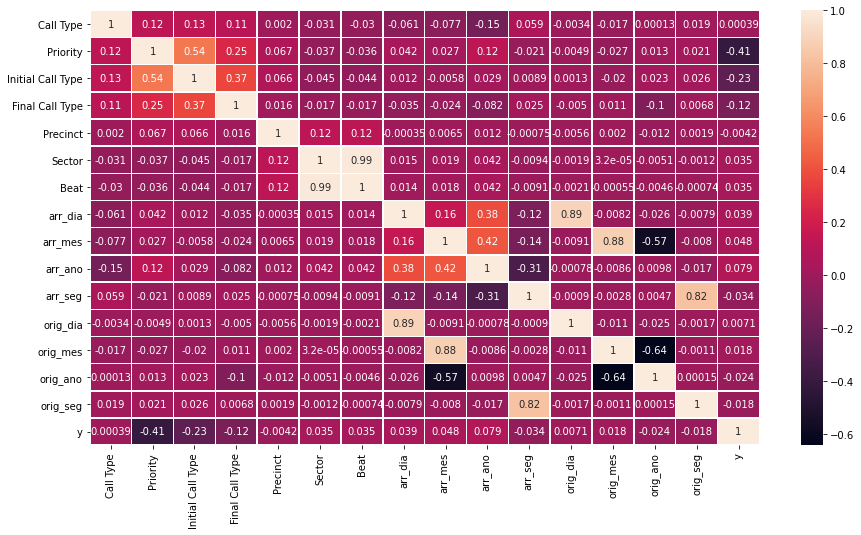

In [102]:
plt.figure(figsize=(15,8))
ax = sns.heatmap(corr, linewidth=0.5,annot=True)
plt.show()

##Vamos excluir os atributos arr_seg, arr_dia, arr_mes e arr_ano que têm correlação alta com orig_seg, orig_dia, orig_mes e orig_ano; bem como Beat que tem correlação alta com Sector

In [103]:
x=x.drop(['arr_dia','arr_mes','arr_ano','arr_seg','Beat','y'],axis=1)

x.head()


,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,orig_dia,orig_mes,orig_ano,orig_seg
0,8,3,193,296,5,12,2,6,2009,13388
1,4,7,149,259,5,7,2,6,2009,13644
2,8,2,93,42,1,10,2,6,2009,13980
3,8,2,23,119,2,11,2,6,2009,14082
4,4,3,184,42,5,7,2,6,2009,14282


##Verificando novamente do desbalanceamento das classse

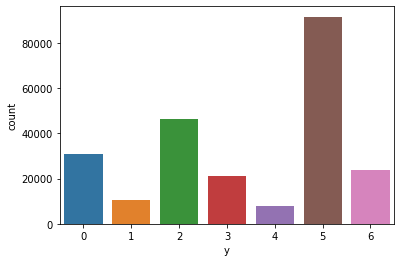

In [104]:
ax = sns.countplot(x="y", data=temp)

 ##Aplicar o NearMiss para balanceamento

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

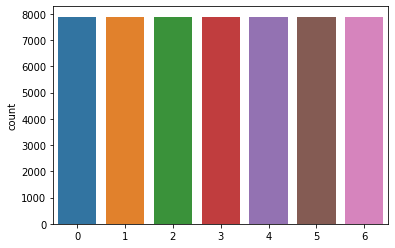

In [105]:
nr = NearMiss()
x, y = nr.fit_sample(x, y)
ax = sns.countplot(x=y)
                     

##Separar as variáveis em treino e teste

In [106]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=100)


## Fazendo agora a normalização para dados de treino e de test


In [107]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


**4. Selecione duas soluções candidatas e justifique suas escolhas. Mostre os pontos negativos e positivos de cada modelo. (2,0 pontos)**

#Resposta 4

##Vamos Investigar 4 modelos para melhor escolha do modelo que será utilizado. Analizaramos Regressão Logística, KNN, Decistion Tree e Random forest, que são modelos que podem ser utilizados em problemas de Classificação supervisionada, que é o nosso caso. Ao final desta investigação teremos os dois modelos selecionados à partir dos seus scores.

**5. Construa os modelos de aprendizagem de máquina para cada modelo (1,0 ponto)**    

#**Resposta 5**

##Vamos definir uma função que calcula o score e mostra a matriz de confusão para cada modelo

In [108]:

def aplica_modelo(modelo,name):

  modelo.fit(x_train,y_train)
  # Here modelo.score first predict the y_test and then gives the accuracy
  #modelo_score=modelo.score(x_test,y_test)
   
  y_prediction = modelo.predict(x_test)
  modelo_score=accuracy_score(y_test,y_prediction)
 
  score_map[name]=modelo_score

  y_actual=y_test
  cm = confusion_matrix(y_actual,y_prediction)
  
  # Heatmap visualization of cunfusion matrix
  f, ax = plt.subplots(figsize =(5,5))
  sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
  plt.xlabel("y_prediction")
  plt.ylabel("y_actual")
  plt.show()

  print("Modelo : %s , Score : % 5.3f" %(name, modelo.score(x_test,y_test)))
  


###Logístic Regression

In [109]:
score_map={}


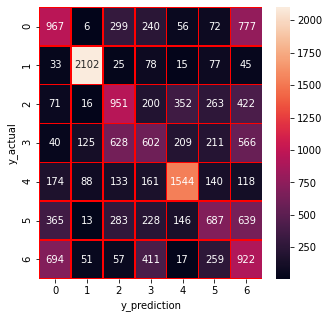

Modelo : l_reg , Score :  0.469


In [110]:
name="l_reg"
lr = LogisticRegression()
aplica_modelo(lr,name)
#lr_score=lr.accuracy_score(y_test,y_prediction)

###KNN - K-Nearest Neighbor

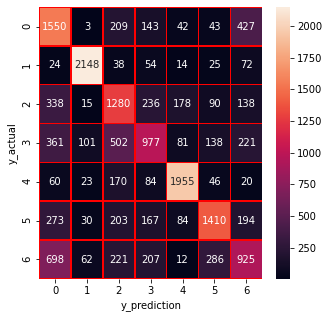

Modelo : knn , Score :  0.618


In [111]:
name="knn"
k = 3
knn = KNeighborsClassifier(n_neighbors = k)
aplica_modelo(knn,name)
knn_score=knn.score(x_test,y_test)

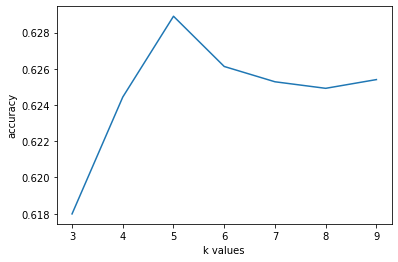

In [112]:
# We can determine best k values with plotting k values versus accuracy
# Here we give values to k from 1 to 15 and calculate the accuracy each time,then plot them.
score_list = []
for each in range(3,10):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(x_train,y_train)
    score_list.append(knn2.score(x_test,y_test))
    
plt.plot(range(3,10),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

###Decision Tree

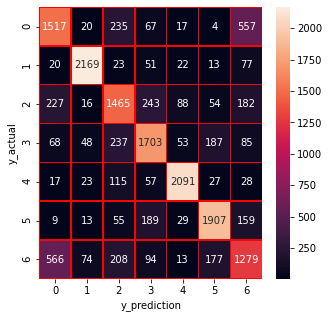

Modelo : d_tree , Score :  0.732


In [113]:
name="d_tree"
dt = DecisionTreeClassifier(random_state = 100)
aplica_modelo(dt,name)
dt_score=dt.score(x_test,y_test)


###Random Forest

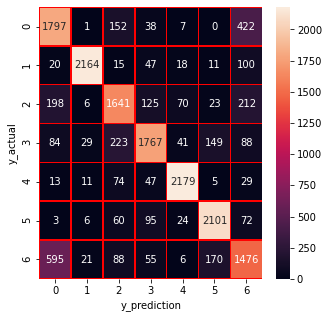

Modelo : r_forest , Score :  0.792


In [114]:
name="r_forest"
rf = RandomForestClassifier(random_state = 100)
aplica_modelo(rf,name)
rf_score=rf.score(x_test,y_test)


In [115]:
score_map

{'d_tree': 0.7317529255640005,
 'knn': 0.6179876945349259,
 'l_reg': 0.46899505368560745,
 'r_forest': 0.7917119073470865}

##Vamos ver os scores dos modelos acima

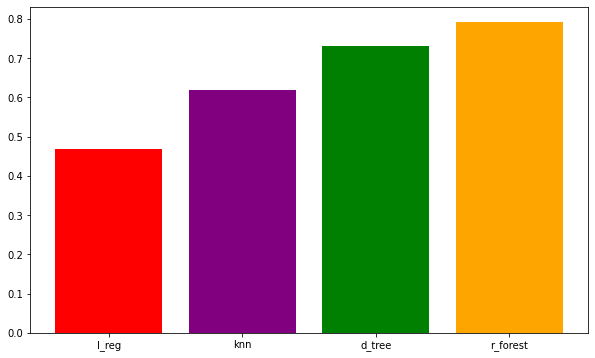

In [116]:
names = list(score_map.keys())
values = list(score_map.values())

#tick_label does the some work as plt.xticks()
colors = ("red","purple","green","orange")
plt.figure(figsize=(10,6))

plt.bar(range(len(score_map)),values,tick_label=names,color=colors)
plt.savefig('bar.png')
plt.show()

#**Resposta 4** Pelos resultados acima, selecionamos os modelos DecisionTree e Random Forest para prosseguir nos cálculos

**6. Para cada modelo aplique uma combinação aos hiperparâmetros com o GridSearch e aplique também o CrossValidation (2,0 pontos)**
  * P.S.: Explique, com suas palavras, a necessidade de utilizar GridSearch e CrossValidation
  * P.S.: Explique a importância de no mínimo um hiperparâmetro para cada modelo

#**Resposta 6**

##Quando estamos avaliando o score um modelo, o score depende da maneira como dividimos os dados. Os dados no conjunto de testes podem ter algumas peculiaridades, significando que o score calculado, pode não ser representativo para o modelo e não tendo a capacidade de generalizar para dados conhecidos.Para combater essa dependência com o split de dados, usamos a técnica chamada validação cruzada ou cross-validation.

##HIPERPARÂMETROS - A ideia base é tentar um conjunto de valores diferentes, ajustar todos eles separadamente, ver o desempenho de cada um e escolher o melhor. Procede-se assim: escolhemos uma matriz de possíveis valores que queremos tentar para o hiperparâmetro e rodamos o modelo para todas as combinações dester hiperparâmetros

##Em seguida, executamos a cross-validation de k fold para cada ponto da matriz, ou seja, para cada hiperparâmetro ou combinação de hiperparâmetros. Em seguida, escolhemos para o nosso modelo a escolha de hiperparâmetros com o melhor desempenho. Isso é chamado de pesquisa em matriz e o sckit-learn é implementado usando a classe GridSearchCV.

##Aplicação do Cross Validation 

In [117]:
def cross(modelo,name):

  scores = cross_val_score(estimator=modelo, X=x_train, y=y_train, cv=10)
  print('New Score', scores)
  print("name : %s , Mean Score : % 5.3f" %(name, scores.mean()))

###Decision Tree

In [118]:
name = "Decision Tree"
modelo=dt
cross(modelo,name)

New Score [0.73293692 0.73629783 0.73888314 0.72595657 0.72595657 0.73267839
 0.72362978 0.74715615 0.7303516  0.7360393 ]
name : Decision Tree , Mean Score :  0.733


###Random Forest

In [119]:
name = "Random Forest"
modelo=rf
cross(modelo,name)

New Score [0.79627715 0.80093071 0.79627715 0.78800414 0.79446743 0.7877456
 0.78541882 0.7983454  0.80196484 0.80118925]
name : Random Forest , Mean Score :  0.795


##Aplicação doGrid Search 

In [120]:
def grid(modelo, param_grid, name):
  dtGS = GridSearchCV(modelo, param_grid, cv=10)
  dtGS.fit(x_train, y_train)
  dtscore = dtGS.score(x_test,y_test)
  
  
  print(dtGS.best_params_)
  best_result = dtGS.best_score_
  print(best_result)

###Decision Tree

In [121]:
param_grid = {'min_samples_leaf':[3,5,7], 
                'min_samples_split':[3,5,7], 
                'max_depth':[6,10,15], 
                'random_state': [100]}
name = "Decision Tree"
modelo = dt
grid(modelo, param_grid, name)

{'max_depth': 15, 'min_samples_leaf': 7, 'min_samples_split': 3, 'random_state': 100}
0.7873578076525336


###Random Forest

In [122]:
param_grid = {
              'n_estimators': [4,6,8,10],
              'max_depth': [4,6,8,10],
              'random_state':[100]
             }
name = "Random Forest"
modelo = rf
grid(modelo, param_grid, name)

{'max_depth': 10, 'n_estimators': 10, 'random_state': 100}
0.7773784901758015


**7. Defina uma métrica de avaliação e avalie as soluções candidatas. Justifique a escolha da sua métrica. (1,0 ponto)**

#**Resposta 7**  

##Resposta - Métrica escolhida-Acurácia, porque é uma boa indicação geral de como o modelo performou. 

##Models Comparision

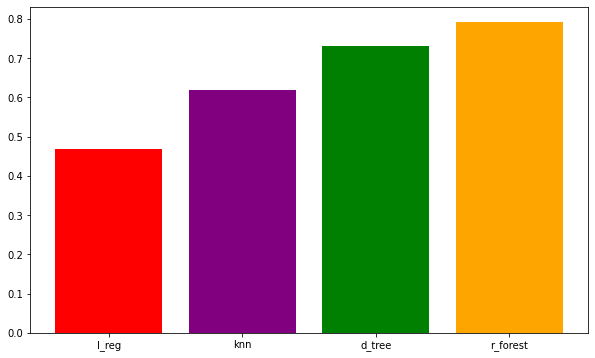

In [123]:
names = list(score_map.keys())
values = list(score_map.values())

#tick_label does the some work as plt.xticks()
colors = ("red","purple","green","orange")
plt.figure(figsize=(10,6))

plt.bar(range(len(score_map)),values,tick_label=names,color=colors)
plt.savefig('bar.png')
plt.show()

**8. Escolha um dos modelos, por exemplo o melhor modelo, e faça uma análise do overfitting e underfitting. Justique sua resposta com base em experimentos. (1,5 pontos)**
   * Analise no mínimo 2 hiperparâmetros e também o número de amostras utilizado no treinamento
   * Utilize recursos visuais, por exemplo gráficos, se você achar neccessário

#**Resposta 8** 

##Modelo Escolhido - Random Forest, por ter sido o que melhor performou, como mostrado acima

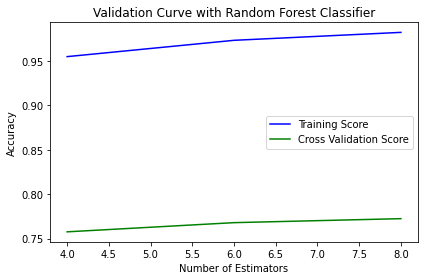

In [124]:
# Calculate accuracy on training and test set using the  
# gamma parameter with 5-fold cross validation 

param_range = np.arange(4, 10,2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),
                                  x_train, y_train, param_name="n_estimators", param_range=param_range,
                                   cv=10, scoring="accuracy", n_jobs=-1)

# Calculating mean and standard deviation of training score 
mean_train_score = np.mean(train_scores, axis = 1) 
std_train_score = np.std(train_scores, axis = 1) 
  
# Calculating mean and standard deviation of testing score 
mean_test_score = np.mean(test_scores, axis = 1) 
std_test_score = np.std(test_scores, axis = 1) 
  
# Plot mean accuracy scores for training and testing scores 
plt.plot(param_range, mean_train_score,  
     label = "Training Score", color = 'b') 
plt.plot(param_range, mean_test_score, 
   label = "Cross Validation Score", color = 'g') 
  
# Creating the plot 
plt.title("Validation Curve with Random Forest Classifier") 
plt.xlabel("Number of Estimators") 
plt.ylabel("Accuracy") 
plt.tight_layout() 
plt.legend(loc = 'best') 
plt.show()

##Análise de Overfiting e Underfiting - Observa-se overfiting, pois o modelo ajusta bem para os dados de treino, mas tem uma performance pior para os dados de teste.

**9. Realize a predição sobre os dados test_call_data.csv, disponibilizado a parte do arquivo Call_Data.csv, como o seu modelo saiu? (1,0 ponto)**

#**Resposta 9**

##Verificar os nulos

In [125]:

xtest=pd.read_csv('/content/test_call_data.csv')
xtest.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,450000,2010000276308,REPORT WRITTEN (NO ARREST),911,2,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),08/09/2010 03:48:41 AM,Aug 9 2010 03:52:17:000AM,NORTH,NORA,N1
1,450003,2010000276311,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",4,"NOISE - DIST, GENERAL (CONST, RESID, BALL PLAY)",--DISTURBANCE - NOISE,08/09/2010 03:54:00 AM,Aug 9 2010 07:21:54:000AM,EAST,GEORGE,G1
2,450006,2010000276315,PROBLEM SOLVING PROJECT,ONVIEW,4,REQUEST TO WATCH,--PREMISE CHECKS - REQUEST TO WATCH,08/09/2010 04:01:36 AM,Aug 9 2010 04:01:36:000AM,WEST,KING,K1
3,450011,2010000276321,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,2,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,08/09/2010 04:11:10 AM,Aug 9 2010 04:19:53:000AM,SOUTH,ROBERT,R1
4,450014,2010000276324,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3,"NOISE - DISTURBANCE (PARTY, ETC)",--DISTURBANCE - NOISE,08/09/2010 04:12:09 AM,Aug 9 2010 04:16:52:000AM,NORTH,UNION,U2


In [126]:

xtest.isnull().sum().sort_values(ascending=False)

Sector                         119
Beat                             0
Precinct                         0
Arrived Time                     0
Original Time Queued             0
Final Call Type                  0
Initial Call Type                0
Priority                         0
Call Type                        0
Event Clearance Description      0
CAD Event Number                 0
Unnamed: 0                       0
dtype: int64

##Preenchendo os nulos com a moda

In [127]:
xtest['Sector'].fillna(xtest['Sector'].mode()[0], inplace=True)
xtest.isnull().sum().sort_values(ascending=False)

Beat                           0
Sector                         0
Precinct                       0
Arrived Time                   0
Original Time Queued           0
Final Call Type                0
Initial Call Type              0
Priority                       0
Call Type                      0
Event Clearance Description    0
CAD Event Number               0
Unnamed: 0                     0
dtype: int64

In [128]:
xtest.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,450000,2010000276308,REPORT WRITTEN (NO ARREST),911,2,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),08/09/2010 03:48:41 AM,Aug 9 2010 03:52:17:000AM,NORTH,NORA,N1
1,450003,2010000276311,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",4,"NOISE - DIST, GENERAL (CONST, RESID, BALL PLAY)",--DISTURBANCE - NOISE,08/09/2010 03:54:00 AM,Aug 9 2010 07:21:54:000AM,EAST,GEORGE,G1
2,450006,2010000276315,PROBLEM SOLVING PROJECT,ONVIEW,4,REQUEST TO WATCH,--PREMISE CHECKS - REQUEST TO WATCH,08/09/2010 04:01:36 AM,Aug 9 2010 04:01:36:000AM,WEST,KING,K1
3,450011,2010000276321,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,2,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,08/09/2010 04:11:10 AM,Aug 9 2010 04:19:53:000AM,SOUTH,ROBERT,R1
4,450014,2010000276324,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3,"NOISE - DISTURBANCE (PARTY, ETC)",--DISTURBANCE - NOISE,08/09/2010 04:12:09 AM,Aug 9 2010 04:16:52:000AM,NORTH,UNION,U2


##Convertendo dados do tipo  datetime

In [129]:
x_datetime = pd.DataFrame()
#x_datetime['arr_dia'] = xtest['Arrived Time'].str.slice(4,6).astype('int32')
mes = xtest['Arrived Time'].str.slice(0,3)
meses = {'Jan':1,'Feb':2, 'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}
#x_datetime['arr_mes'] = mes.map(meses)
#x_datetime['arr_ano'] = xtest['Arrived Time'].str.slice(7,11).astype('int32')
hora=xtest['Arrived Time'].str.slice(12,20)
#x_datetime['arr_seg']=hora.str.slice(0,2).astype(int)*3600+hora.str.slice(3,5).astype(int)*60+hora.str.slice(6,8).astype(int)
x_datetime['orig_dia'] = xtest['Original Time Queued'].str.slice(3,5).astype('int32')
x_datetime['orig_mes']  = xtest['Original Time Queued'].str.slice(0,2).astype('int32')
x_datetime['orig_mes']
x_datetime['orig_ano'] = xtest['Original Time Queued'].str.slice(6,10).astype('int32')
hora=xtest['Original Time Queued'].str.slice(11,19)
x_datetime['orig_seg']=hora.str.slice(0,2).astype(int)*3600+hora.str.slice(3,5).astype(int)*60+hora.str.slice(6,8).astype(int)
x_datetime

,orig_dia,orig_mes,orig_ano,orig_seg
0,9,8,2010,13721
1,9,8,2010,14040
2,9,8,2010,14496
3,9,8,2010,15070
4,9,8,2010,15129
...,...,...,...,...
23090,24,9,2010,27892
23091,24,9,2010,27985
23092,24,9,2010,28115
23093,24,9,2010,28199


In [130]:
xtest.head()

,Unnamed: 0,CAD Event Number,Event Clearance Description,Call Type,Priority,Initial Call Type,Final Call Type,Original Time Queued,Arrived Time,Precinct,Sector,Beat
0,450000,2010000276308,REPORT WRITTEN (NO ARREST),911,2,PROPERTY - DAMAGE,--PROPERTY DEST (DAMG),08/09/2010 03:48:41 AM,Aug 9 2010 03:52:17:000AM,NORTH,NORA,N1
1,450003,2010000276311,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,"TELEPHONE OTHER, NOT 911",4,"NOISE - DIST, GENERAL (CONST, RESID, BALL PLAY)",--DISTURBANCE - NOISE,08/09/2010 03:54:00 AM,Aug 9 2010 07:21:54:000AM,EAST,GEORGE,G1
2,450006,2010000276315,PROBLEM SOLVING PROJECT,ONVIEW,4,REQUEST TO WATCH,--PREMISE CHECKS - REQUEST TO WATCH,08/09/2010 04:01:36 AM,Aug 9 2010 04:01:36:000AM,WEST,KING,K1
3,450011,2010000276321,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,2,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,08/09/2010 04:11:10 AM,Aug 9 2010 04:19:53:000AM,SOUTH,ROBERT,R1
4,450014,2010000276324,UNABLE TO LOCATE INCIDENT OR COMPLAINANT,911,3,"NOISE - DISTURBANCE (PARTY, ETC)",--DISTURBANCE - NOISE,08/09/2010 04:12:09 AM,Aug 9 2010 04:16:52:000AM,NORTH,UNION,U2


In [131]:

xtest['Call Type'] = le_calltype.fit_transform(xtest['Call Type'])
xtest['Initial Call Type'] = le_initial.transform(xtest['Initial Call Type'])
xtest['Final Call Type'] = le_final.transform(xtest['Final Call Type'])
xtest['Precinct'] = le_precinct.transform(xtest['Precinct'])
xtest['Sector'] = le_sector.transform(xtest['Sector'])
xtest['Beat'] = le_beat.transform(xtest['Beat'])

xtest['Event Clearance Description'] = le_event.transform(xtest['Event Clearance Description'])

ytest=xtest['Event Clearance Description']
xtest=xtest.drop(['Event Clearance Description','Unnamed: 0','CAD Event Number','Original Time Queued','Arrived Time','Beat'],axis=1)
xtest



,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector
0,0,2,150,95,1,10
1,7,4,131,40,0,5
2,4,4,160,91,5,7
3,0,2,184,108,2,13
4,0,3,132,40,1,15
...,...,...,...,...,...,...
23090,4,7,198,118,5,12
23091,0,2,196,42,5,9
23092,7,6,169,111,3,4
23093,4,3,43,9,0,3


##Normalização dos dados


In [132]:

xtest=pd.concat([xtest, x_datetime], axis=1, join='inner')
#scaler = StandardScaler()
xtest = scaler.transform(xtest)
pd.DataFrame(xtest)
xtest=pd.DataFrame(xtest)
xtest.columns=['Call Type',	'Priority',	'Initial Call Type',	'Final Call Type',
               'Precinct',	'Sector', 'orig_dia',	'orig_mes',	'orig_ano',	'orig_seg']
xtest.head()

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,orig_dia,orig_mes,orig_ano,orig_seg
0,-1.403215,-1.045276,0.170509,0.088813,-0.769849,0.440113,-0.772801,0.451119,0.857728,-0.927942
1,1.083349,-0.072330,-0.221487,-1.177088,-1.286582,-0.580436,-0.772801,0.451119,0.857728,-0.904089
2,0.017679,-0.072330,0.376822,-0.003253,1.297082,-0.172216,-0.772801,0.451119,0.857728,-0.869993
3,-1.403215,-1.045276,0.871974,0.388026,-0.253116,1.052443,-0.772801,0.451119,0.857728,-0.827073
4,-1.403215,-0.558803,-0.200855,-1.177088,-0.769849,1.460663,-0.772801,0.451119,0.857728,-0.822662


##Cálculo da Acurácia

In [133]:
#rf.fit(xtest,ytest)
ypred = rf.predict(xtest)
acuracia = accuracy_score(ytest, ypred)
#acuracia = rf.score(ytest,ypred)

#ytest = le.fit_transform(ytest)
ytest_df=pd.DataFrame(ytest)
ypred_df=pd.DataFrame(ypred)

xtest_df=pd.DataFrame(xtest)

resultado = pd.concat([xtest_df,ytest_df,ypred_df], axis=1)
resultado.columns=['Call Type',	'Priority',	'Initial Call Type',	'Final Call Type',	'Precinct',	'Sector',
                   'orig_dia',	'orig_mes',	'orig_ano',	'orig_seg','ytest','ypred']
resultado.head()

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,orig_dia,orig_mes,orig_ano,orig_seg,ytest,ypred
0,-1.403215,-1.045276,0.170509,0.088813,-0.769849,0.440113,-0.772801,0.451119,0.857728,-0.927942,5,5
1,1.083349,-0.072330,-0.221487,-1.177088,-1.286582,-0.580436,-0.772801,0.451119,0.857728,-0.904089,6,1
2,0.017679,-0.072330,0.376822,-0.003253,1.297082,-0.172216,-0.772801,0.451119,0.857728,-0.869993,4,4
3,-1.403215,-1.045276,0.871974,0.388026,-0.253116,1.052443,-0.772801,0.451119,0.857728,-0.827073,6,6
4,-1.403215,-0.558803,-0.200855,-1.177088,-0.769849,1.460663,-0.772801,0.451119,0.857728,-0.822662,6,6


In [134]:
print("Acuracy : % 5.3f" %(acuracia))

Acuracy :  0.539


##Modelo tem performance inferior, confirmando o overfiting mencionado acima

**10. Se seu modelo permitir analisar a importância das features, analise-o e tente justificar de forma subjetiva a importância das features. Por exemplo, a feature chamadas_a_noite possui um alto coeficiente, pois há uma tendência dos crimes acontecerem a noite, não tão simples assim :P. (1,0 ponto)**

#**Resposta 10**

In [135]:
importance = rf.feature_importances_
print(importance)

imp_map={}
for i,v in enumerate(importance):
  imp_map[i]=v
	#print('Feature: %0d, Score: %.5f' % (i,v))


[0.05894891 0.08541194 0.2567675  0.28225688 0.0241136  0.04331229
 0.07631996 0.05383866 0.01147538 0.10755488]


In [136]:
imp_map=pd.DataFrame.from_dict(imp_map, orient='index')
imp_map = imp_map.T
#imp_map.reset_index
imp_map.columns=['Call Type',	'Priority',	'Initial Call Type',	'Final Call Type',
                 'Precinct',	'Sector',	'orig_dia',	'orig_mes',	'orig_ano',	'orig_seg']


<Figure size 720x432 with 0 Axes>

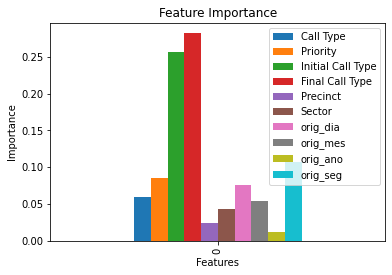

In [137]:
plt.figure(figsize=(10,6))
ax = imp_map.plot.bar()

plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')

plt.show()

##Os atributos de maior importância são Initial Call Type e Final Call Type, talvez porque das variáveis categóricas são as que mais tem correlação com a variável alvo

 **11. Aplique clusterização, preferencialmente o KMeans sobre o dado, e comunique suas novas descobertas, sinta-se a vontade para apresentar uma solução com recursos visuais (2,0 pontos)**

#**Resposta 11** 

##K-means não funciona bem com dados Categóricas então usaremos uma variação do K-means denominada  K-mode

In [138]:
# First we will keep a copy of data
df_copy = df.copy()

##Preparação dos dados

In [139]:
df=df.drop(['Beat'],axis=1)

In [140]:
!pip install KModes
from kmodes.kmodes import KModes


##Utilizando K-Mode com a inicialização  "Huang" 


In [141]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 29225, cost: 960483.0
Run 1, iteration: 2/100, moves: 13710, cost: 956072.0
Run 1, iteration: 3/100, moves: 182, cost: 956072.0


In [142]:
fitClusters_cao

array([0, 0, 1, ..., 1, 0, 0], dtype=uint16)

In [143]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [144]:
# Mode of the clusters
clusterCentroidsDf

,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector
0,4,3,198,118,5,7
1,8,2,169,119,1,0


##Escolhendo  K através da comparação de Cost versus cada K


In [145]:
cost = []
for num_clusters in list(range(4,8,1)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 43944, cost: 805624.0
Run 1, iteration: 2/100, moves: 15241, cost: 805624.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 37090, cost: 782166.0
Run 1, iteration: 2/100, moves: 20301, cost: 773902.0
Run 1, iteration: 3/100, moves: 4372, cost: 773902.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 31707, cost: 766831.0
Run 1, iteration: 2/100, moves: 10339, cost: 761903.0
Run 1, iteration: 3/100, moves: 3242, cost: 761903.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23653, cost: 726031.0
Run 1, iteration: 2/100, moves: 380, cost: 726031.0


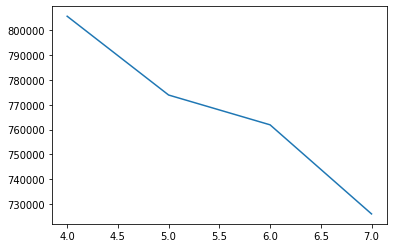

In [146]:
y = np.array([i for i in range(4,8,1)])
plt.plot(y,cost)

## Escolhendo K=7

In [147]:
km_cao = KModes(n_clusters=7, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 23653, cost: 726031.0
Run 1, iteration: 2/100, moves: 380, cost: 726031.0


In [148]:
fitClusters_cao

array([0, 6, 1, ..., 1, 0, 2], dtype=uint16)

##Combinando os valores preditos com os valores originais.

In [149]:
df = df_copy.reset_index()


In [150]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [151]:
combinedDf.head()


,Call Type,Priority,Initial Call Type,Final Call Type,Precinct,Sector,Beat,cluster_predicted
0,8,3,193,296,5,12,62,0
1,4,7,149,259,5,7,39,6
2,8,2,93,42,1,10,54,1
3,8,2,23,119,2,11,56,5
4,4,3,184,42,5,7,40,0


##Grafico com a contagem das clusters preditas

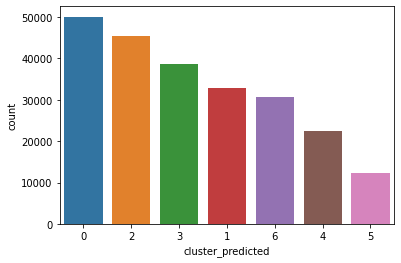

In [152]:
sns.countplot(x="cluster_predicted", data=combinedDf,order = combinedDf['cluster_predicted'].value_counts().index)

#combinedDf=combinedDf.sort_values(['cluster_predicted'].value_counts().index)
#ax = sns.countplot(x="cluster_predicted", data=combinedDf)

##Comparar com os dados originais

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

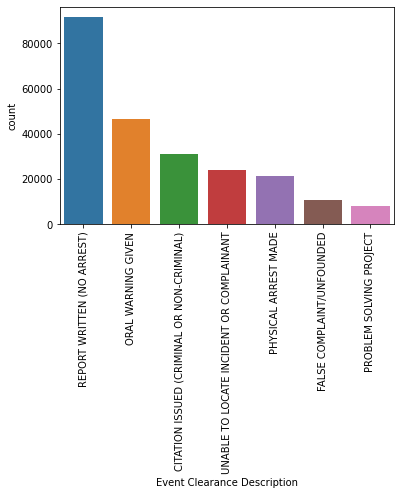

In [153]:
sns.countplot(x="Event Clearance Description", data=df_orig,order = df_orig['Event Clearance Description'].value_counts().index)
plt.xticks(rotation=90)


##Podemos ver uma ligeira semelhança entre os resultados, sendo a cluster REPORT WRITTEN, permanecendo como a mais frequente

##Identificado dos Clusters


In [154]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]
cluster_5 = combinedDf[combinedDf['cluster_predicted'] == 5]
cluster_6 = combinedDf[combinedDf['cluster_predicted'] == 6]

In [155]:
cluster_0.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 50046 entries, 0 to 232440
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Call Type          50046 non-null  int64 
 1   Priority           50046 non-null  int64 
 2   Initial Call Type  50046 non-null  int64 
 3   Final Call Type    50046 non-null  int64 
 4   Precinct           50046 non-null  int64 
 5   Sector             50046 non-null  int64 
 6   Beat               50046 non-null  int64 
 7   cluster_predicted  50046 non-null  uint16
dtypes: int64(7), uint16(1)
memory usage: 3.2 MB


In [156]:
cluster_1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32850 entries, 2 to 232439
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Call Type          32850 non-null  int64 
 1   Priority           32850 non-null  int64 
 2   Initial Call Type  32850 non-null  int64 
 3   Final Call Type    32850 non-null  int64 
 4   Precinct           32850 non-null  int64 
 5   Sector             32850 non-null  int64 
 6   Beat               32850 non-null  int64 
 7   cluster_predicted  32850 non-null  uint16
dtypes: int64(7), uint16(1)
memory usage: 2.1 MB


In [157]:
cluster_6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30601 entries, 1 to 232408
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Call Type          30601 non-null  int64 
 1   Priority           30601 non-null  int64 
 2   Initial Call Type  30601 non-null  int64 
 3   Final Call Type    30601 non-null  int64 
 4   Precinct           30601 non-null  int64 
 5   Sector             30601 non-null  int64 
 6   Beat               30601 non-null  int64 
 7   cluster_predicted  30601 non-null  uint16
dtypes: int64(7), uint16(1)
memory usage: 1.9 MB


##Grafico dos clusters por Call Type

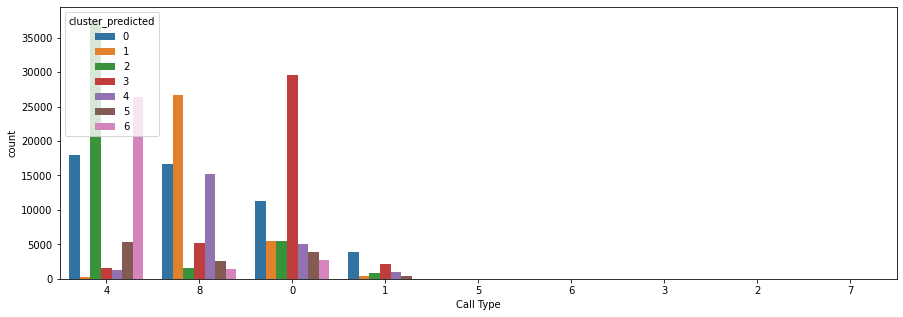

In [158]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Call Type'],order=combinedDf['Call Type'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

##Grafico dos clusters por Priority

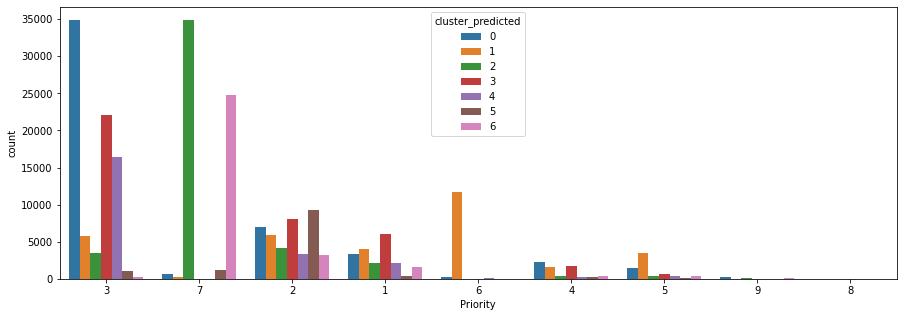

In [159]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Priority'],order=combinedDf['Priority'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

##Grafico dos clusters por Precinct

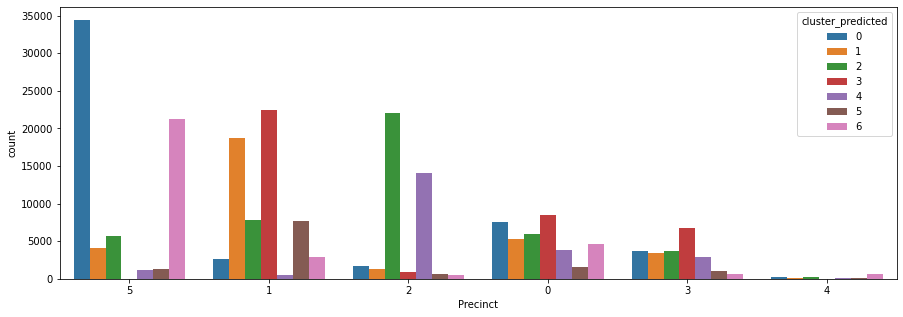

In [160]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Precinct'],order=combinedDf['Precinct'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

##Grafico dos clusters por Sector

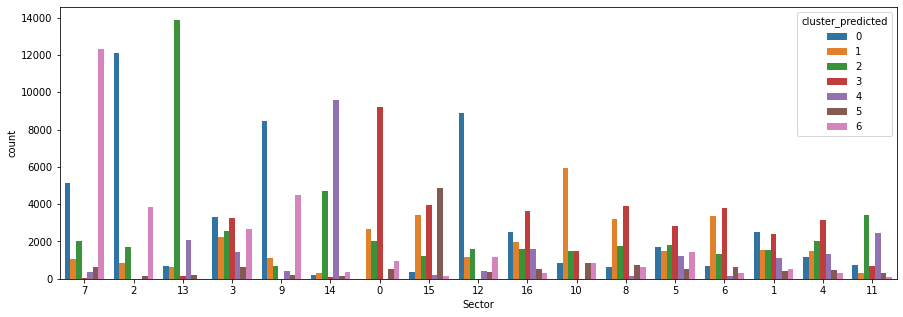

In [161]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['Sector'],order=combinedDf['Sector'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

# Bom trabalho!